In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('/Users/emilylin/Downloads/Merged Dataset.xlsx', index_col=[0])
df

,Postal Abbr.,State,Year,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Disposable personal income,Gross domestic product (GDP),Implicit regional price deflator,...,Total violent robbery,No. of persons 25 and over (in thou) Total,No. of persons 25 and over (in thou) Male,No. of persons 25 and over (in thou) Female,Percentage with high school completion or higher (%) total,Percentage with high school completion or higher (%) Male,Percentage with high school completion or higher (%) Female,Percentage with bachelor's or higher degree (%) total,Percentage with bachelor's or higher degree (%) Male,Percentage with bachelor's or higher degree (%) Female
0,AL,Alabama,2013,2172102,2012828,159274,7.3,159063.1,194786.9,92.163,...,4648,3226,1525,1701,84.9,84.0,85.7,23.5,23.4,23.5
1,AL,Alabama,2014,2164715,2018705,146010,6.7,164562.8,197406.9,93.632,...,4701,3259,1536,1723,84.6,83.7,85.5,23.0,22.7,23.3
2,AL,Alabama,2015,2152295,2020443,131852,6.1,171157.0,202372.4,93.071,...,4611,3283,1550,1733,85.1,84.1,86.1,24.0,23.7,24.3
3,AL,Alabama,2016,2155729,2029157,126572,5.9,173653.1,207368.4,94.903,...,4686,3300,1558,1742,84.9,83.3,86.3,24.7,24.5,24.9
4,AL,Alabama,2017,2203458,2103873,99585,4.5,180348.3,214606.3,95.383,...,4217,3314,1569,1745,86.0,85.0,86.9,25.6,24.7,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,WY,Wyoming,2015,301608,288894,12714,4.2,30239.2,38426.9,100.912,...,59,388,191,197,93.2,93.2,93.1,26.9,26.6,27.1
353,WY,Wyoming,2016,300546,284439,16107,5.4,28807.8,35879.0,101.796,...,59,391,199,192,93.2,93.0,93.5,26.5,25.5,27.6
354,WY,Wyoming,2017,293802,281164,12638,4.3,29625.5,36980.7,102.923,...,76,389,198,190,93.1,92.7,93.4,27.6,25.9,29.3
355,WY,Wyoming,2018,292629,280754,11875,4.1,31548.4,39171.7,99.863,...,100,394,200,194,92.7,92.5,93.0,27.0,25.6,28.4


In [3]:
df.columns

Index(['Postal Abbr.', 'State', 'Year', 'Civilian_labor_force', 'Employed',
       'Unemployed', 'Unemployment_rate', 'Disposable personal income',
       'Gross domestic product (GDP)', 'Implicit regional price deflator',
       'Per capita disposable personal income',
       'Per capita personal consumption expenditures (PCE)',
       'Per capita personal income', 'Personal consumption expenditures',
       'Personal income', 'Real GDP', 'Real PCE', 'Real per capita PCE',
       'Real per capita personal income', 'Real personal income',
       'Regional price parities (RPPs)', 'Total employment (number of jobs)',
       'Population', 'Rates of all crimes', 'Rates of burglary',
       'Rates of larceny', 'Rates of motor', 'Rates of violent crimes',
       'Rates of violent assault', 'Rates of violent murder',
       'Rates of violent rape', 'Rates of violent robbery', 'Total crimes',
       'Total burglary', 'Total larceny', 'Total motor',
       'Total violent crimes', 'Total violent

In [4]:
#find relevant index of the wanted columns for simpler filtering 
crime_index_start = df.columns.get_loc('Total crimes')
crime_index_end = df.columns.get_loc('Total violent robbery')
print(crime_index_start)
print(crime_index_end)

32
40


In [5]:
#select a subset of the dataset with the relevant data
state_year_columns = df.iloc[:, [1, 2]]
income_columns = df[['Population','Disposable personal income','Real GDP','Real personal income']]
crime_columns = df.iloc[:, 32:41]
new_df = pd.concat([state_year_columns, income_columns, crime_columns], axis=1)
new_df

,State,Year,Population,Disposable personal income,Real GDP,Real personal income,Total crimes,Total burglary,Total larceny,Total motor,Total violent crimes,Total violent assault,Total violent murder,Total violent rape,Total violent robbery
0,Alabama,2013,4833722,159063.1,191369.8,190336.3,161993,42429,108993,10571,20826,13787,347,2044,4648
1,Alabama,2014,4849377,164562.8,189886.3,193661.1,154094,39715,104238,10141,20727,13745,276,2005,4701
2,Alabama,2015,4858979,171157.0,191335.2,203544.4,144746,35255,99156,10335,22952,15954,348,2039,4611
3,Alabama,2016,4863300,173653.1,194283.8,203118.8,143362,34065,97574,11723,25886,18877,407,1916,4686
4,Alabama,2017,4874747,180348.3,196974.9,209348.5,144160,31477,99842,12841,25551,18902,404,2028,4217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Wyoming,2015,586107,30239.2,40418.2,33514.3,11151,1762,8797,592,1302,1054,16,173,59
353,Wyoming,2016,585501,28807.8,38188.7,31411.1,11460,1771,8889,800,1430,1146,20,205,59
354,Wyoming,2017,579315,29625.5,37521.6,32095.1,10604,1593,8232,779,1376,1022,15,263,76
355,Wyoming,2018,577737,31548.4,38080.1,34886.7,10313,1525,7949,839,1226,870,13,243,100


In [6]:
# Grouping the dataset by the 'State' column
state_grouped = new_df.groupby('State')

# Calculate aggregate summaries for the grouped data
aggregate_income_crime = state_grouped[new_df.columns[3:]].agg(['mean','min','max'])

# Reset the index to have 'State' as a regular column, not an index
aggregate_income_crime = aggregate_income_crime.reset_index()

# Center-align columns using HTML-style formatting
aggregate_income_crime = aggregate_income_crime.style.set_properties(**{'text-align': 'centre'})

aggregate_income_crime

In [7]:
# Calculate the overall average population for each state
state_average_population = df.groupby('State')['Population'].mean().reset_index()

# Determine the highest, middle, and lowest average population values
highest_population = state_average_population['Population'].quantile(0.75)
lowest_population = state_average_population['Population'].quantile(0.25)
middle_population = state_average_population['Population'].median()

# Categorize states based on average population
def categorize_population(row):
    if row['Population'] > highest_population:
        return 'Highest Population'
    elif row['Population'] < lowest_population:
        return 'Lowest Population'
    else:
        return 'Middle Population'

# Add a 'Population Category' column to state_average_population
state_average_population['Population Category'] = state_average_population.apply(categorize_population, axis=1)

# Retrieve the corresponding US state names for each category
highest_population_states = state_average_population[state_average_population['Population Category'] == 'Highest Population']['State']
middle_population_states = state_average_population[state_average_population['Population Category'] == 'Middle Population']['State']
lowest_population_states = state_average_population[state_average_population['Population Category'] == 'Lowest Population']['State']

# Display the results
print("States with Highest Average Population:")
print(highest_population_states.tolist())

print("\nStates with Middle Average Population:")
print(middle_population_states.tolist())

print("\nStates with Lowest Average Population:")
print(lowest_population_states.tolist())

States with Highest Average Population:
['California', 'Florida', 'Georgia', 'Illinois', 'Michigan', 'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Pennsylvania', 'Texas', 'Virginia', 'Washington']

States with Middle Average Population:
['Alabama', 'Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'Nevada', 'New Mexico', 'Oklahoma', 'Oregon', 'South Carolina', 'Tennessee', 'Utah', 'West Virginia', 'Wisconsin']

States with Lowest Average Population:
['Alaska', 'Delaware', 'District of Columbia', 'Hawaii', 'Idaho', 'Maine', 'Montana', 'New Hampshire', 'North Dakota', 'Rhode Island', 'South Dakota', 'Vermont', 'Wyoming']


In [9]:
# Filter data for the year 2019
df_2019 = df[df['Year'] == 2019]

# Specify the number of bins
num_bins = 5

# Use pd.qcut to create quantile-based bins
bins, bin_edges = pd.qcut(df_2019['Disposable personal income'], q=num_bins, retbins=True, \
                          labels=False, duplicates='drop')

# Get the bin labels based on the bin edges
bin_labels = [f'Bin {i}' for i in range(1, num_bins + 1)]

# Print the bin edges and labels
print("Bin Edges:")
print(bin_edges)
print("\nBin Labels:")
print(bin_labels)

Bin Edges:
[  31911.    70507.   144102.   275745.2  442540.1 2198931.7]

Bin Labels:
['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5']


In [10]:
income_bins = pd.qcut(df_2019['Disposable personal income'], q=5, labels=False, duplicates='drop')

#modify bin labels to correspond approx. values from returned by q.cut
bin_labels = ['< $70K', '\$70K-$144K', '\$144K-$275K', '\$275K-$442K', '> $442K']

# Create a new column 'Disposable Personal Income Bins' based on the bins
df_2019['Disposable Personal Income Bins'] = pd.Categorical.from_codes(income_bins, categories=bin_labels)

# Group the data based on bins
grouped_data = df_2019.groupby('Disposable Personal Income Bins')

# Calculate aggregate summaries for crime numbers (e.g., mean, sum) within each income bin
crime_summaries = grouped_data[['Total crimes','Total burglary','Total motor','Total violent crimes',\
                             'Total violent assault','Total violent murder','Total violent rape',\
                                'Total violent robbery']].agg(['mean', 'median'])
crime_summaries 

/var/folders/p4/fc0y79yj5f917y5ct7ggtcy80000gn/T/ipykernel_13084/2377259175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Disposable Personal Income Bins'] = pd.Categorical.from_codes(income_bins, categories=bin_labels)


Total crimes           Total burglary  \
                                          mean    median           mean   
Disposable Personal Income Bins                                           
< $70K                            18870.727273   16743.0    2704.363636   
\$70K-$144K                       53181.100000   59984.0    9765.900000   
\$144K-$275K                     111204.600000  113878.5   19823.400000   
\$275K-$442K                     145986.100000  144701.0   22256.900000   
> $442K                          361438.100000  249742.5   56948.600000   

                                           Total motor           \
                                  median          mean   median   
Disposable Personal Income Bins                                   
< $70K                            2608.0   1635.727273   1756.0   
\$70K-$144K                       9427.5   5398.600000   5500.5   
\$144K-$275K                     20794.5  12270.800000  11918.5   
\$275K-$442K                     20929.5  15419.000000  15733.5   
> $442K                          41700.0  37300.800000  18723.5   

                                Total violent crimes           \
                                                mean   median   
Disposable Personal Income Bins                                 
< $70K                                   3633.818182   3530.0   
\$70K-$144K                              8723.300000   7912.5   
\$144K-$275K                            18489.400000  17078.0   
\$275K-$442K                            26787.400000  23772.0   
> $442K                                 66543.700000  45394.5   

                                Total violent assault           \
                                                 mean   median   
Disposable Personal Income Bins                                  
< $70K                                    2512.272727   2676.0   
\$70K-$144K                               6262.500000   5013.5   
\$144K-$275K                             13017.500000  11913.0   
\$275K-$442K                             18011.500000  16203.5   
> $442K                                  42063.200000  29852.0   

                                Total violent murder         \
                                                mean median   
Disposable Personal Income Bins                               
< $70K                                     45.272727   25.0   
\$70K-$144K                               115.300000   66.0   
\$144K-$275K                              295.900000  243.5   
\$275K-$442K                              344.900000  371.0   
> $442K                                   836.600000  661.5   

                                Total violent rape          \
                                              mean  median   
Disposable Personal Income Bins                              
< $70K                                  528.090909   491.0   
\$70K-$144K                            1218.500000  1208.5   
\$144K-$275K                           2052.900000  2211.0   
\$275K-$442K                           3277.000000  2814.5   
> $442K                                6852.200000  5904.5   

                                Total violent robbery           
                                                 mean   median  
Disposable Personal Income Bins                                 
< $70K                                     548.181818    205.0  
\$70K-$144K                               1127.000000   1128.0  
\$144K-$275K                              3123.100000   3138.5  
\$275K-$442K                              5154.000000   5239.0  
> $442K                                  16791.700000  11103.5

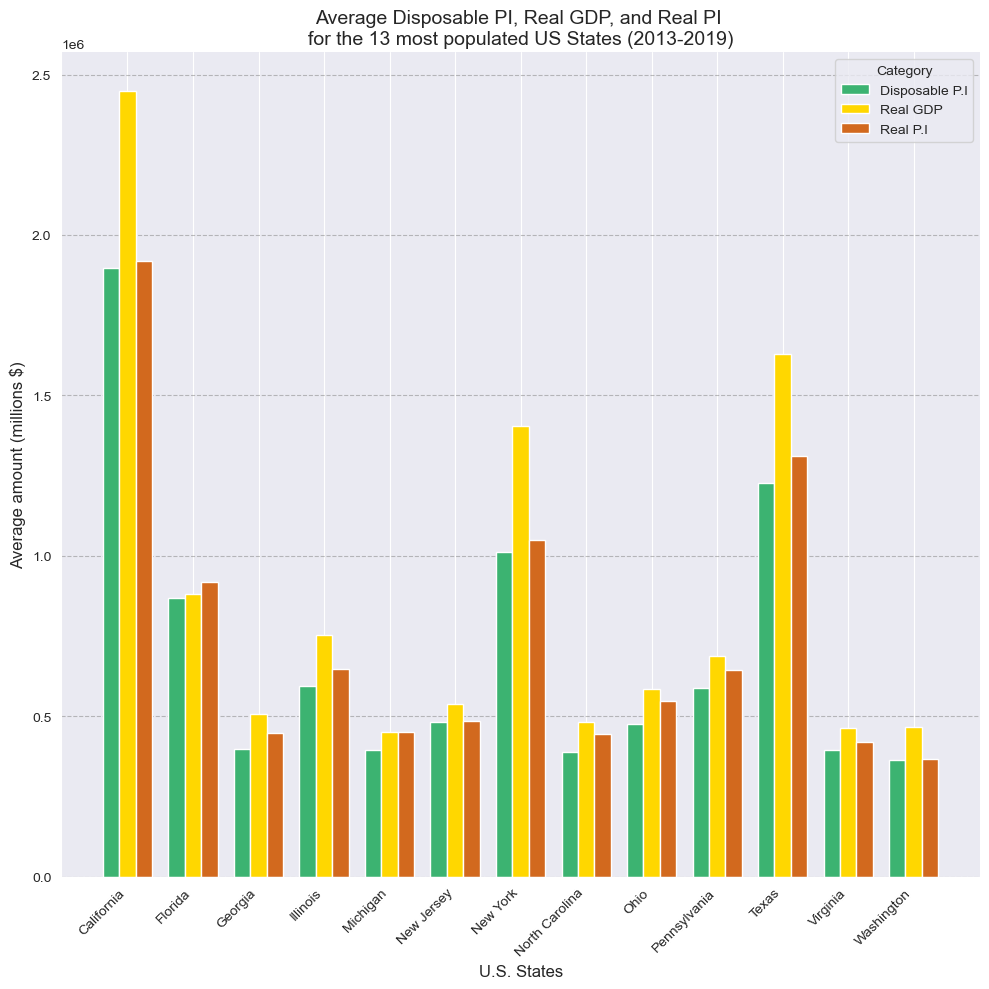

In [11]:
# Filter the dataset to include only specific U.S. states
states_of_interest = ['California', 'Florida', 'Georgia', 'Illinois', 'Michigan', 'New Jersey', 'New York', \
                      'North Carolina', 'Ohio', 'Pennsylvania','Texas', 'Virginia', 'Washington']  

filtered_df = new_df[new_df['State'].isin(states_of_interest)]

# Group the data by state and calculate the mean DPI and GDP
grouped_data = filtered_df.groupby('State')[['Disposable personal income', 'Real GDP','Real personal income']].mean()

# Apply a Seaborn style
sns.set_style("darkgrid")

# Create a bar plot with grouped bars
fig, ax = plt.subplots(figsize=(10, 10))

index = np.arange(len(states_of_interest))  # X-axis index positions for the bars
bar_width = 0.25  # Width of each bar
bar_spacing = 0.05  # Additional spacing between bars

dpi_data = grouped_data['Disposable personal income']
gdp_data = grouped_data['Real GDP']
real_pi_data = grouped_data['Real personal income']

bar1 = ax.bar(index, dpi_data, bar_width, label='Disposable P.I', color='mediumseagreen')
bar2 = ax.bar([i + bar_width for i in index], gdp_data, bar_width, label='Real GDP', color='gold')
bar3 = ax.bar([i + 2 * bar_width for i in index], real_pi_data, bar_width, label='Real P.I', color='chocolate')

# Set x-axis labels and title
ax.set_xlabel('U.S. States', fontsize=12)
ax.set_ylabel('Average amount (millions $)', fontsize=12)
# Set the title text and configure it for a two-line title
title_text = 'Average Disposable PI, Real GDP, and Real PI \nfor the 13 most populated US States (2013-2019)'
ax.set_title(title_text, fontsize=14, loc='center')

# Set x-axis tick positions and labels
ax.set_xticks([i + bar_width for i in index])
# Rotate x-axis labels
ax.set_xticklabels(states_of_interest, rotation=45, ha="right", fontsize=10)  

# Customize the legend
ax.legend(title='Category', fontsize=10)
ax.get_legend().set_title('Category')

# Add grid lines
ax.grid(color='gray',axis='y', linestyle='--', alpha=0.5)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize the y-axis ticks and labels
plt.yticks(fontsize=10)  # Increase font size for y-axis labels

# Adjust the space between x-axis labels
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.tight_layout()
plt.show()

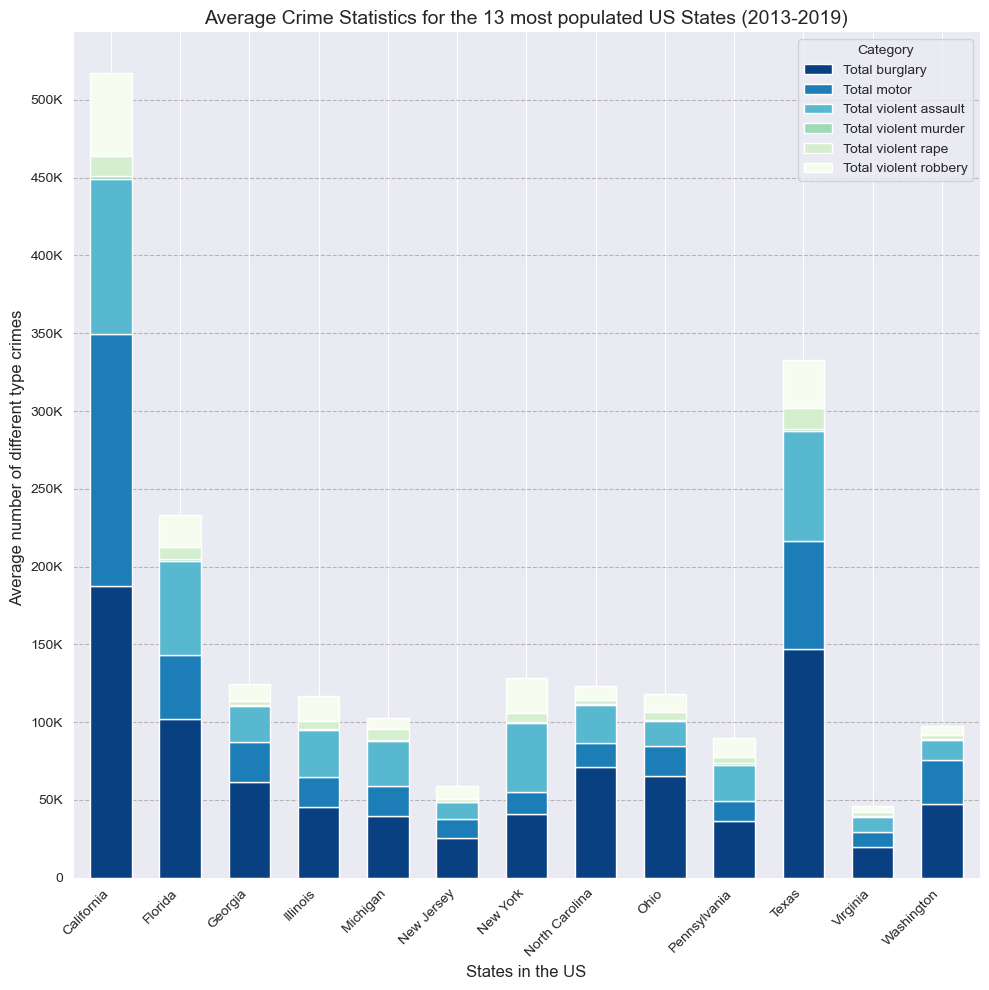

In [12]:
# Group the data by state and calculate the mean total crimes
grouped_data = filtered_df.groupby('State')[['Total burglary', 'Total motor', \
                                             'Total violent assault', 'Total violent murder', \
                                             'Total violent rape','Total violent robbery']].mean()

# Apply a Seaborn style
sns.set_style("darkgrid")

# Stacked bar chart for crime statistics
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 10),colormap='GnBu_r',width=0.6,edgecolor=None)

# Set labels and title
ax.set_xlabel('States in the US', fontsize=12)
ax.set_ylabel('Average number of different type crimes ', fontsize=12)
ax.set_title('Average Crime Statistics for the 13 most populated US States (2013-2019)',fontsize=14)

# Customize colors
ax.set_prop_cycle('color', sns.color_palette("Paired"))

# Add a legend with a title
ax.legend(title='Category',loc='upper right',fontsize=10)

# Set x-axis labels to the states of interest
plt.xticks(range(len(states_of_interest)), states_of_interest, rotation=45, ha="right", fontsize=10)


# Change Y-Axis Increments
# Specify custom ticks and labels here
custom_y_ticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]  
custom_y_labels = ['0', '50K', '100K', '150K', '200K','250K','300K','350K','400K','450K','500K']  
plt.yticks(custom_y_ticks, custom_y_labels)

# Add grid lines
ax.grid(color='gray',axis='y', linestyle='--', alpha=0.5)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

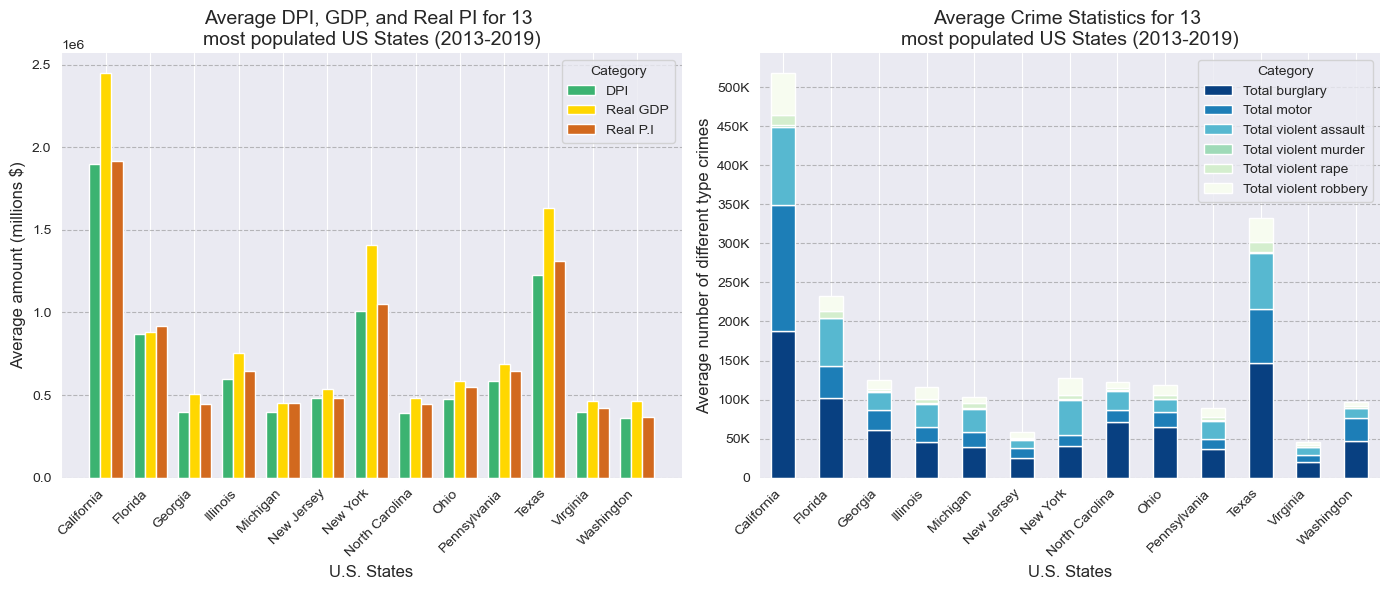

In [13]:
# Filter the dataset to include only specific U.S. states
states_of_interest = ['California', 'Florida', 'Georgia', 'Illinois', 'Michigan', \
                      'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Pennsylvania', \
                      'Texas', 'Virginia', 'Washington']

filtered_df = new_df[new_df['State'].isin(states_of_interest)]

# Group the data by state and calculate the mean DPI and GDP
grouped_data_dpi = filtered_df.groupby('State')['Disposable personal income'].mean()
grouped_data_gdp = filtered_df.groupby('State')['Real GDP'].mean()
grouped_data_real_pi = filtered_df.groupby('State')['Real personal income'].mean()

# Group the data by state and calculate the mean total crimes
grouped_data_crimes = filtered_df.groupby('State')[['Total burglary', 'Total motor', 'Total violent assault',
                                                   'Total violent murder', 'Total violent rape',
                                                   'Total violent robbery']].mean()

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot DPI, GDP, and Real per capita PI on the first subplot
index = np.arange(len(states_of_interest))  # X-axis index positions for the bars
bar_width = 0.25  # Width of each bar
bar_spacing = 0.05  # Additional spacing between bars

dpi_data = grouped_data_dpi.values
gdp_data = grouped_data_gdp.values
real_pi_data = grouped_data_real_pi.values

bar1 = ax1.bar(index, dpi_data, bar_width, label='DPI', color='mediumseagreen')
bar2 = ax1.bar([i + bar_width for i in index], gdp_data, bar_width, label='Real GDP', color='gold')
bar3 = ax1.bar([i + 2 * bar_width for i in index], real_pi_data, bar_width, label='Real P.I', color='chocolate')

ax1.set_xlabel('U.S. States', fontsize=12)
ax1.set_ylabel('Average amount (millions $)', fontsize=12)
ax1.set_title('Average DPI, GDP, and Real PI for 13 \nmost populated US States (2013-2019)', fontsize=14)
ax1.set_xticks([i + bar_width for i in index])
ax1.set_xticklabels(states_of_interest, rotation=45, ha="right", fontsize=10)
ax1.legend(title='Category', fontsize=10)
ax1.get_legend().set_title('Category')
ax1.grid(color='gray', axis='y', linestyle='--', alpha=0.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.yticks(fontsize=10)
plt.subplots_adjust(bottom=0.2)

# Plot crime statistics on the second subplot

ax2 = grouped_data_crimes.plot(kind='bar', stacked=True, ax=ax2, colormap='GnBu_r', width=0.5)
ax2.set_xlabel('U.S. States', fontsize=12)
ax2.set_ylabel('Average number of different type crimes', fontsize=12)
ax2.set_title('Average Crime Statistics for 13 \nmost populated US States (2013-2019)', fontsize=14)
ax2.set_xticks(range(len(states_of_interest)))
custom_y_ticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]
custom_y_labels = ['0', '50K', '100K', '150K', '200K','250K','300K','350K','400K','450K','500K']
plt.yticks(custom_y_ticks, custom_y_labels)

ax2.set_xticklabels(states_of_interest, rotation=45, ha="right", fontsize=10)
ax2.legend(title='Category', loc='upper right', fontsize=10)
ax2.grid(color='gray', axis='y', linestyle='--', alpha=0.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()
